# Mini Project 3

Welcome to your Third Mini Project! You will build a convolutional neural network to classify objects and tune hyperparameters to optimize your model. **Please complete your assignment in this Jupyter Notebook.**

---

**Requirements**: 
- Pytorch is allowed to implement your NNs.
- Your code should follow [PEP 8](https://www.python.org/dev/peps/pep-0008/) with necessary comments.
- Write your analysis and conclusion in a proper format. [Click here](https://www.markdownguide.org/basic-syntax/) to learn how to use Markdown.

## Problem Description
This dataset consists of four different classes: **Bicycle, Motorcycle, Car, Truck**. Bicycle, Motorcycle, and Car data are collected from the 2005 PASCAL dataset [VOC2005](http://host.robots.ox.ac.uk/pascal/VOC/databases.html#VOC2005_1). Moreover, the Truck data is collected from the Internet (see examples below).

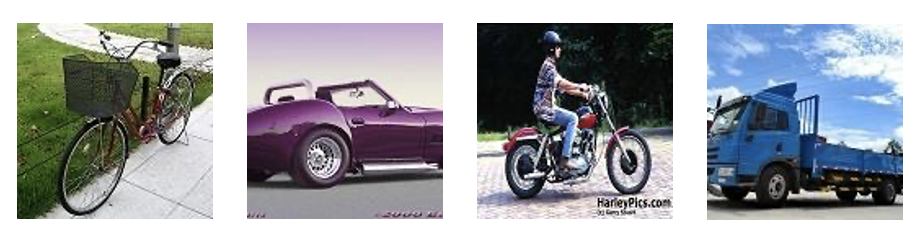



- The width and height of each **RGB** image are 120 pixels and 120 pixels respectively.
- The filename of an image represents its index.
- Labels are saved in `labels.csv` where the first column is the image index and the second column is the label.
- Labels and their corresponding classes are listed below.

|Label|0|1|2|3|
|-----|:-:|:-:|:-:|:-:|
|Class|Bicycle|Car|Motocycle|Truck|

### Tasks

1. Load and pre-process data
    - Define a function of `load_data()` to load imges and labels.
    - Implement a function of `preprocess()` to pre-process the loaded data.
        - Normalization
        - One-hot encoding
        - Splitting dataset into training set and test set
    - Plot some examples in your training set. **Note**: all four classes should be shown in your plot.
2. Build your CNN model
    - Build a CNN based on Pytorch.
    - Use the [PyTorchViz](https://github.com/szagoruyko/pytorchviz) or other tools to visualize your model.
3. Train your model
    - Initialize hyperparameters.
    - Train your model.
    - Evaluate the trained model on the test data in each training epoch.
    - Visualize the performance including training loss, training accuracy, test loss, and test accuracy.
    - Plot some examples of your prediction results.
4. Tune hyperparameters
    - Generate a set of models by tuning hyperparameters including:
        - kernel size
        - number of hidden layers
        - learning rate
        - epochs
        - activation function
    - Analyze the effects of each hyperparameter shown above.
5. Conclusion
    - Visualize the optimal model.
    - Describe its hyperparameters.
    - Plot the performance.
    - Plot some examples of prediction results.

In [ ]:
from google.colab import drive
import pandas
import numpy as np
import glob
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
!pip install torchviz
from torchviz import make_dot
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4151 sha256=3cb1446117d15129d4e53d01dedd4a29a02b66bc6c768b635f3a95014dca72de
  Stored in directory: /root/.cache/pip/wheels/29/65/6e/db2515eb1dc760fecd36b40d54df65c1e18534013f1c037e2e
Successfully built torchviz


## Task 1: Load and Pre-Process Dataset

In [ ]:
def load_data(folder):
    """
        Load the dataset, included images and labels from the given folder.
        
        Parameters
        ----------
        folder: string
            Path of the folder saved dataset.

        Return
        ----------
        images: ndarray
            Output of images.
        labels: ndarray
            Output of labels.
    """
    # TODO: write your code here
    drive.mount("/content/drive") # mount the drive
    path = "/content/drive/My Drive/Coursework/Deep Learning/Mini Project 03/" + folder + "/" # path to dataset directory
    images = [] # initialize empty list to store images
    for image in sorted(glob.iglob(path + "*.jpg")): # loop through all images
        images.append(np.asarray(Image.open(image))) # append image to list as numpy array
    images = np.array(images) # convert list of all images to numpy array
    labels = pandas.read_csv(path + "Labels.csv") # read Labels.csv file
    labels = labels["label"].to_numpy() # extract labels and convert to numpy array
    return images, labels

In [ ]:
def preprocess(X, y, train_size=0.8):
    """
        Normalize the features from the range [0, 255] to the range [0, 1].
        One-hot encode labels.
        Split the dataset into training set and test set. 
        
        Parameters
        ----------
        X: ndarray
            Input of images.
        y: ndarray
            Input of labels.
        train_size: float
            The proportion of the dataset to include in the train split.

        Return
        ----------
        X_train: ndarray
            Splitted features of the training data.
        y_train: ndarray
            Splitted labels of the traning data.
        X_test: ndarray
            Splitted features of the test data.
        y_test: ndarray
            Splitted labels of the test data.
    """
    # TODO: write your code here
    X_normalized = (X-np.min(X))/(np.max(X)-np.min(X)) # normalization of features (images) as numpy array
    # print(X_normalized) # verify normalized features
    y_encoded = F.one_hot(torch.from_numpy(y), num_classes = 4).numpy() # one-hot encoding of labels as numpy array
    # print(y_encoded) # verify encoded labels
    X_train, X_test = torch.utils.data.random_split(X_normalized, [train_size, 1-train_size], generator=torch.Generator().manual_seed(42)) # split features into training set and test set
    y_train, y_test = torch.utils.data.random_split(y_encoded, [train_size, 1-train_size], generator=torch.Generator().manual_seed(42)) # split labels into training set and test set
    X_train, X_test, y_train, y_test = np.asarray(X_train), np.asarray(X_test), np.asarray(y_train), np.asarray(y_test) # convert to numpy arrays
    return X_train, X_test, y_train, y_test

In [ ]:
# TODO: load dataset
images, labels = load_data('Dataset') # load data (images and labels as numpy arrays)
# print(images) # verify images
# print(labels) # verify labels
# print(images.shape) # verify shape of images array
# print(images[0].shape) # verify sample image shape
# print(labels.shape) # verify shape of labels array

# TODO: pre-process dataset
X_train, X_test, y_train, y_test = preprocess(images, labels, train_size=0.8)

# TODO: print out shapes of X_train, y_train, X_test, and y_test
print(X_train.shape) # print shape X_train
print(y_train.shape) # print shape y_train
print(X_test.shape) # print shape X_test
print(y_test.shape) # print shape y_test

Mounted at /content/drive
(760, 120, 120, 3)
(760, 4)
(189, 120, 120, 3)
(189, 4)


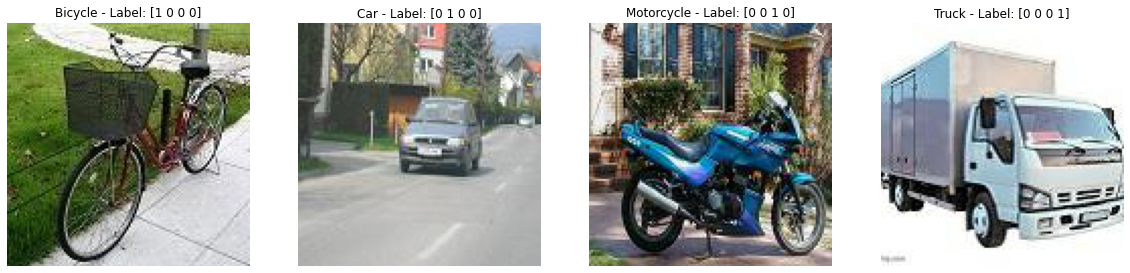

In [ ]:
# TODO: get examples of each class from the training set
'''
# get examples of each class from the entire dataset
bicycle = np.random.choice(np.asarray(np.asarray(labels==0).nonzero())[0], size=1) # randomly sample a bicycle image
car = np.random.choice(np.asarray(np.asarray(labels==1).nonzero())[0], size=1) # randomly sample a car image
motorcycle = np.random.choice(np.asarray(np.asarray(labels==2).nonzero())[0], size=1) # randomly sample a motorcycle image
truck = np.random.choice(np.asarray(np.asarray(labels==3).nonzero())[0], size=1) # randomly sample a truck image
'''
bicycle =(X_train[600]) # bicycle image
car = (X_train[500]) # car image
motorcycle = (X_train[350]) # motorcycle image
truck = (X_train[1]) # truck image

# TODO: plot out selected examples in ONE figure
# define figure size
plt.figure(figsize=(20, 80))
# subplot to show bicycle
plt.subplot(1, 4, 1)
plt.imshow(bicycle)
plt.axis('off')
plt.title("Bicycle - Label: {}".format(y_train[600]))
# subplot to show car
plt.subplot(1, 4, 2)
plt.imshow(car)
plt.axis('off')
plt.title("Car - Label: {}".format(y_train[500]))
# subplot to show motorcycle
plt.subplot(1, 4, 3)
plt.imshow(motorcycle)
plt.axis('off')
plt.title("Motorcycle - Label: {}".format(y_train[350]))
# subplot to show truck
plt.subplot(1, 4, 4)
plt.imshow(truck)
plt.axis('off')
plt.title("Truck - Label: {}".format(y_train[1]))
# show plot
plt.show()

## Task 2: Build Convolutional Neural Network

In [ ]:
# TODO: build a CNN model
class Create_Data(Dataset): # create pytorch compatible data
    def __init__(self, data, target, transform=None):
        data = np.reshape(data, (data.shape[0], 3, 120, 120)) # reshape features (ndarray images) by pytorch conventions
        self.data = torch.from_numpy(data).float() # convert features (ndarray images) to pytorch tensor
        target = torch.from_numpy(target).long() # reshape one-hot encoded labels by pytorch conventions
        self.target = torch.argmax(target, dim=1) # convert one-hot vectors to class labels format for pytorch
        self.transform = transform # define transform
        
    def __getitem__(self, index):
        x = self.data[index] # feature
        y = self.target[index] # label
        if self.transform:
            x = self.transform(x) # apply transform
        return x, y
    
    def __len__(self):
        return len(self.data) # dataset size

class CNN_Model(nn.Module): # define cnn model
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1), # convolution layer 1
            nn.ReLU(), # ReLU activation function
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1), # convolution layer 2
            nn.ReLU(), # ReLU activation function
            nn.MaxPool2d(2,2), # pooling layer 1
            nn.Flatten(), # flatten layer 1
            nn.Linear(115200, 1024), # fully connected layer 1
            nn.ReLU(), # ReLU activation function
            nn.Linear(1024, 512), # fully connected layer 2
            nn.ReLU(), # ReLU activation function
            nn.Linear(512, 4) # output layer
        )
    
    def forward(self, x):
        return self.network(x) # define how the model is going to be run, from input to output
      
    def training_step(self, batch):
        images, labels = batch # extract features and labels from batch
        outputs = self.network(images) # generate predictions
        _, predictions = torch.max(outputs, dim=1) # convert predictions
        loss = F.cross_entropy(outputs, labels) # calculate loss
        accuracy = torch.tensor(torch.sum(predictions==labels).item()/len(predictions)) # calculate accuracy
        return loss, accuracy
    
    def testing_step(self, batch):
        images, labels = batch # extract features and labels from batch
        outputs = self.network(images) # generate predictions
        _, predictions = torch.max(outputs, dim=1) # convert predictions
        loss = F.cross_entropy(outputs, labels) # calculate loss
        accuracy = torch.tensor(torch.sum(predictions==labels).item()/len(predictions)) # calculate accuracy
        return {'test_loss': loss.detach(), 'test_accuracy': accuracy}
    
    def epoch_end(self, epoch, result):
        print("Epoch: {}    Train Loss: {:.4f}    Train Accuracy: {:.4f}    Test Loss: {:.4f}    Test Accuracy: {:.4f}".format(
              epoch+1, result['train_loss'], result['train_accuracy'], result['test_loss'], result['test_accuracy'])) # print training stats at end of each epoch

CNN_Model(
  (network): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Flatten(start_dim=1, end_dim=-1)
    (6): Linear(in_features=115200, out_features=1024, bias=True)
    (7): ReLU()
    (8): Linear(in_features=1024, out_features=512, bias=True)
    (9): ReLU()
    (10): Linear(in_features=512, out_features=4, bias=True)
  )
)


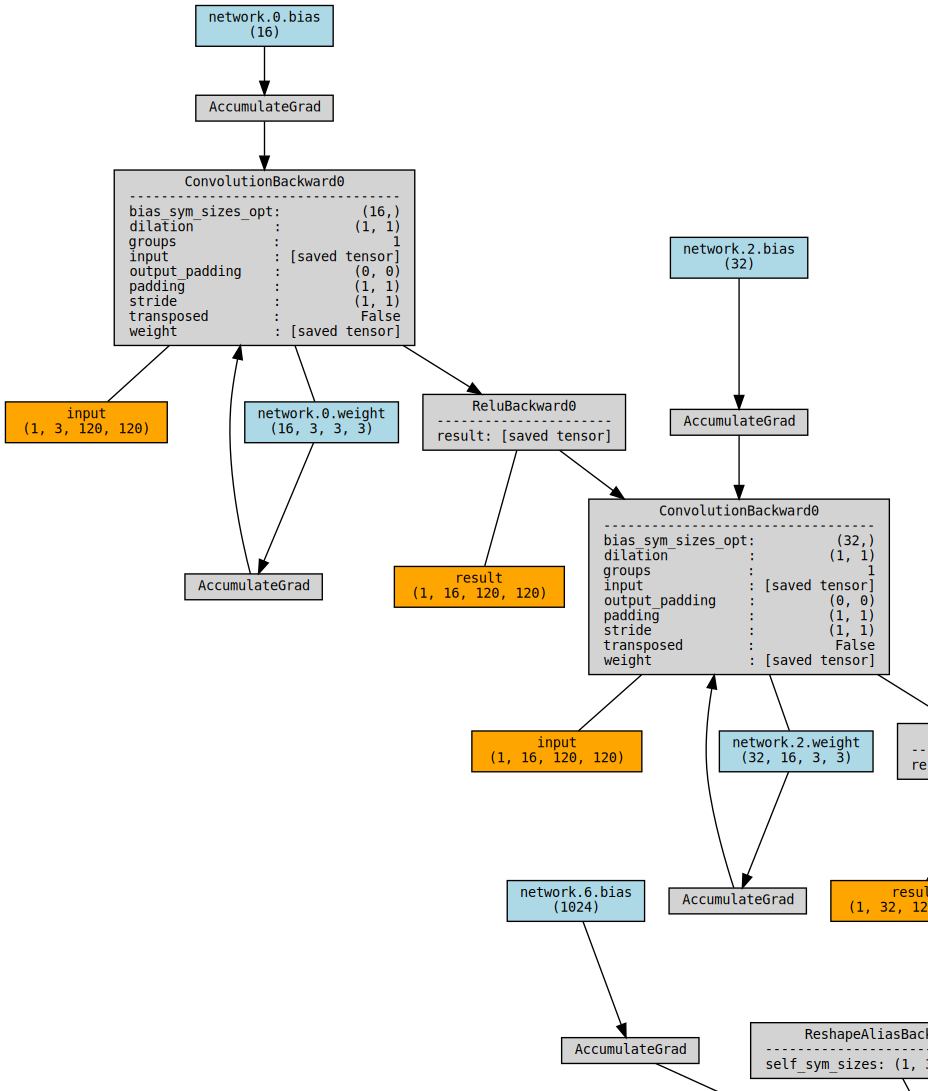

In [ ]:
# TODO: visualize the model
cnn_model = CNN_Model() # cnn model object
print(cnn_model) # print the cnn model
x = torch.randn(1, 3, 120, 120) # sample input to cnn model [batch_size, channels, depth, height, width]
y = cnn_model(x) # sample output of cnn model
dot = make_dot(y, params=dict(cnn_model.named_parameters()), show_attrs=True, show_saved=True) # create model visualization
dot.format = "pdf" # model visualization saving format
dot.render("/content/drive/My Drive/Coursework/Deep Learning/Mini Project 03/CNN") # save model visualization
dot # visualize model

## Task 3: Train Model

In [ ]:
# TODO: initialize hyperparameters
num_epochs = 9 # number of epochs
num_workers = 2 # number of sub-processes to use for data loading
batch_size = 64 # batch size
# num_batches = X_train.shape[0]//batch_size # number of batches
learning_rate = 0.001 # learning rate
loss_function = nn.CrossEntropyLoss() # loss function (pytorch automatically applies softmax activation to output for cross-entropy loss)
optimizer = optim.Adam # optimizer
# training dataset
train_data = Create_Data(X_train, y_train) # training dataset
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=torch.cuda.is_available()) # training dataset loader
# testing dataset
test_data = Create_Data(X_test, y_test) # testing dataset
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=torch.cuda.is_available()) # testing dataset loader

In [ ]:
# TODO: train the model
@torch.no_grad()
def evaluate(model, test_loader):
    model.eval()
    outputs = [model.testing_step(batch) for batch in test_loader] # model predictions
    batch_losses = [x['test_loss'] for x in outputs] # batch losses
    epoch_loss = torch.stack(batch_losses).mean() # combine losses
    batch_accuracies = [x['test_accuracy'] for x in outputs] # batch accuracies
    epoch_accuracy = torch.stack(batch_accuracies).mean() # combine accuracies
    return {'test_loss': epoch_loss.item(), 'test_accuracy': epoch_accuracy.item()}

def fit(model, train_loader, test_loader, epochs, lr, optimizer):
    print("Started Training!\n\n")
    history = [] # list of model training/testing history
    optimizer = optimizer(model.parameters(), lr) # optimizer
    for epoch in range(epochs): # loop for epochs
        # training stage
        model.train() # set model to training mode
        train_losses = [] # initialize list for training losses
        train_accuracies = [] # initialize list for training losses
        for batch in train_loader: # loop for batches
            # forward propagation
            loss, accuracy = model.training_step(batch)
            # loss computation
            train_losses.append(loss)
            train_accuracies.append(accuracy)
            # backward propagation
            optimizer.zero_grad() # reset gradients to zero
            loss.backward() # calculate gradients
            # parameter update
            optimizer.step() # step in the direction of steepest descent
        # testing stage
        result = evaluate(model, test_loader) # run predictions over test dataset batch to add testing loss and accuracy to result
        result['train_loss'] = torch.stack(train_losses).mean().item() # add training loss to result
        result['train_accuracy'] = torch.stack(train_accuracies).mean().item() # add training accuracy to result
        model.epoch_end(epoch, result) # print training and testing loss and accuracy at the end of each epoch
        history.append(result) # add results to history buffer
    print("\n\nFinished Training!")
    return history

history = fit(cnn_model, train_loader, test_loader, num_epochs, learning_rate, optimizer) # train (and test) the model

Started Training!


Epoch: 1    Train Loss: 4.2924    Train Accuracy: 0.2680    Test Loss: 1.2777    Test Accuracy: 0.4650
Epoch: 2    Train Loss: 1.2680    Train Accuracy: 0.4453    Test Loss: 1.1979    Test Accuracy: 0.4454
Epoch: 3    Train Loss: 1.1415    Train Accuracy: 0.4691    Test Loss: 1.1198    Test Accuracy: 0.5030
Epoch: 4    Train Loss: 1.0280    Train Accuracy: 0.5206    Test Loss: 1.0710    Test Accuracy: 0.5241
Epoch: 5    Train Loss: 0.9313    Train Accuracy: 0.5887    Test Loss: 1.0604    Test Accuracy: 0.5436
Epoch: 6    Train Loss: 0.7751    Train Accuracy: 0.7031    Test Loss: 1.1271    Test Accuracy: 0.5189
Epoch: 7    Train Loss: 0.6374    Train Accuracy: 0.7426    Test Loss: 0.9882    Test Accuracy: 0.6082
Epoch: 8    Train Loss: 0.4676    Train Accuracy: 0.8417    Test Loss: 1.0933    Test Accuracy: 0.6032
Epoch: 9    Train Loss: 0.3691    Train Accuracy: 0.8726    Test Loss: 1.0467    Test Accuracy: 0.5670


Finished Training!


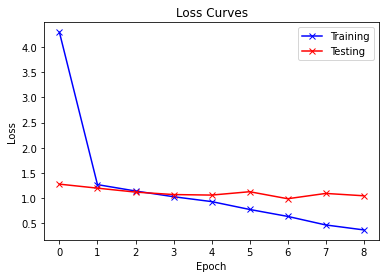

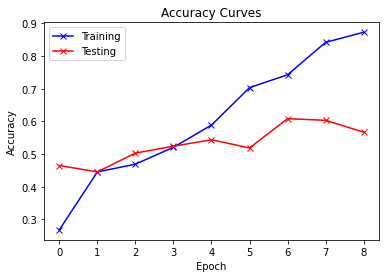

In [ ]:
# TODO: visualize the training history including accuracy curves and loss curves
def plot_accuracies(history):
    """ Plot the history of accuracies in each epoch"""
    train_accuracies = [x.get('train_accuracy') for x in history] # get train accuracies
    test_accuracies = [x['test_accuracy'] for x in history] # get test accuracies
    plt.plot(train_accuracies, '-bx') # plot train accuracies
    plt.plot(test_accuracies, '-rx') # plot test accuracies
    plt.xlabel('Epoch') # label for x-axis
    plt.ylabel('Accuracy') # label for y-axis
    plt.legend(['Training', 'Testing']) # legend
    plt.title('Accuracy Curves') # title
    plt.show() # show plot

def plot_losses(history):
    """ Plot the history of losses in each epoch"""
    train_losses = [x.get('train_loss') for x in history] # get train losses
    test_losses = [x['test_loss'] for x in history] # get test losses
    plt.plot(train_losses, '-bx')  # plot train losses
    plt.plot(test_losses, '-rx') # plot test losses
    plt.xlabel('Epoch') # label for x-axis
    plt.ylabel('Loss') # label for y-axis
    plt.legend(['Training', 'Testing']) # legend
    plt.title('Loss Curves') # title 
    plt.show() # show plot

plot_losses(history) # loss curves
plot_accuracies(history) # accuracy curves

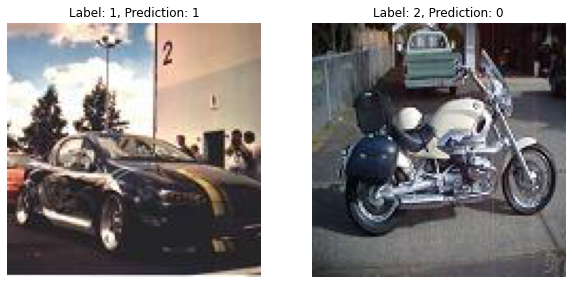

In [ ]:
# TODO: visualize a couple of examples with predicted labels
cnn_model.eval() # set model to testing mode
for batch in test_loader: # run predictions over test dataset
    images, labels = batch # extract features and labels from batch
    outputs = cnn_model(images) # generate predictions
    _, predictions = torch.max(outputs, dim=1) # convert predictions

# define figure size
plt.figure(figsize=(10, 40))
# subplot to show first prediction
plt.subplot(1, 2, 1)
index = np.random.randint(0, len(predictions)) # generate random index
plt.imshow(images[index].reshape(120, 120, 3)) # reshape and show a random sample
plt.axis('off') # turn off plot axis
plt.title("Label: {}, Prediction: {}".format(np.array(labels)[index], np.array(predictions)[index]))
# subplot to show second prediction
plt.subplot(1, 2, 2)
index = np.random.randint(0, len(predictions)) # generate random index
plt.imshow(images[index].reshape(120, 120, 3)) # reshape and show a random sample
plt.axis('off') # turn off plot axis
plt.title("Label: {}, Prediction: {}".format(np.array(labels)[index], np.array(predictions)[index]))
plt.show()

## Task 4: Tune Hyperparameters

Following sampling space was be used for hyperparameter tuning.

| Hyperparameter      | Option 1 | Option 2 | Option 3 | Option 4  | Option 5 |
|---------------------|----------|----------|----------|-----------|----------|
| Kernel Size         | 3        | 5        | 7        | 9         | 11       |
| # Hidden (Conv) Layers     | 1        | 2        | 3        | 4         | 5        |
| Learning Rate       | 0.001    | 0.005    | 0.01     | 0.05      | 0.1      |
| # Epochs            | 5        | 10       | 12       | 15        | 20       |
| Activation Function | ReLU     | ELU      | Tanh     | LeakyReLU | GELU     |

Latin Hypercube Sampling (LHS) was performed manually on the above sampling space to sample a few yet meaningful samples (spanning the entire space) for hyperprameters in an efficient way (as opposed to full factorial sampling).

In [ ]:
# TODO: write your code here
param_set_1 = np.array([3, 2, 0.01, 12, nn.LeakyReLU()]) # hyperparameters for model 1
param_set_2 = np.array([9, 3, 0.005, 15, nn.GELU()]) # hyperparameters for model 2
param_set_3 = np.array([7, 5, 0.001, 5, nn.ELU()]) # hyperparameters for model 3
param_set_4 = np.array([5, 1, 0.05, 20, nn.Tanh()]) # hyperparameters for model 4
param_set_5 = np.array([11, 4, 0.01, 10, nn.ReLU()]) # hyperparameters for model 5

### Model 1

In [ ]:
class CNN_Model(nn.Module): # define cnn model
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=param_set_1[0], padding=1), # convolution layer 1
            param_set_1[4], # activation function
            nn.Conv2d(16, 32, kernel_size=param_set_1[0], stride=1, padding=1), # convolution layer 2
            param_set_1[4], # activation function
            nn.MaxPool2d(2,2), # pooling layer 1
            nn.Flatten(), # flatten layer 1
            nn.Linear(115200, 1024), # fully connected layer 1
            param_set_1[4], # activation function
            nn.Linear(1024, 512), # fully connected layer 2
            param_set_1[4], # activation function
            nn.Linear(512, 4) # output layer
        )
    
    def forward(self, x):
        return self.network(x) # define how the model is going to be run, from input to output
      
    def training_step(self, batch):
        images, labels = batch # extract features and labels from batch
        outputs = self.network(images) # generate predictions
        _, predictions = torch.max(outputs, dim=1) # convert predictions
        loss = F.cross_entropy(outputs, labels) # calculate loss
        accuracy = torch.tensor(torch.sum(predictions==labels).item()/len(predictions)) # calculate accuracy
        return loss, accuracy
    
    def testing_step(self, batch):
        images, labels = batch # extract features and labels from batch
        outputs = self.network(images) # generate predictions
        _, predictions = torch.max(outputs, dim=1) # convert predictions
        loss = F.cross_entropy(outputs, labels) # calculate loss
        accuracy = torch.tensor(torch.sum(predictions==labels).item()/len(predictions)) # calculate accuracy
        return {'test_loss': loss.detach(), 'test_accuracy': accuracy}
    
    def epoch_end(self, epoch, result):
        print("Epoch: {}    Train Loss: {:.4f}    Train Accuracy: {:.4f}    Test Loss: {:.4f}    Test Accuracy: {:.4f}".format(
              epoch+1, result['train_loss'], result['train_accuracy'], result['test_loss'], result['test_accuracy'])) # print training stats at end of each epoch

cnn_model_1 = CNN_Model() # cnn model object
history_1 = fit(model=cnn_model_1, train_loader=train_loader, test_loader=test_loader, epochs=param_set_1[3], lr=param_set_1[2], optimizer=optim.Adam) # train (and test) the model

Started Training!


Epoch: 1    Train Loss: 93.2717    Train Accuracy: 0.2881    Test Loss: 1.8230    Test Accuracy: 0.3496
Epoch: 2    Train Loss: 1.4493    Train Accuracy: 0.3795    Test Loss: 1.2968    Test Accuracy: 0.3757
Epoch: 3    Train Loss: 1.3144    Train Accuracy: 0.3800    Test Loss: 1.2981    Test Accuracy: 0.3754
Epoch: 4    Train Loss: 1.3099    Train Accuracy: 0.3560    Test Loss: 1.2912    Test Accuracy: 0.3804
Epoch: 5    Train Loss: 1.3008    Train Accuracy: 0.3969    Test Loss: 1.2842    Test Accuracy: 0.3913
Epoch: 6    Train Loss: 1.2815    Train Accuracy: 0.4167    Test Loss: 1.2313    Test Accuracy: 0.4660
Epoch: 7    Train Loss: 1.2381    Train Accuracy: 0.4505    Test Loss: 1.2097    Test Accuracy: 0.4871
Epoch: 8    Train Loss: 1.2191    Train Accuracy: 0.4455    Test Loss: 1.1930    Test Accuracy: 0.4762
Epoch: 9    Train Loss: 1.9811    Train Accuracy: 0.4403    Test Loss: 1.2801    Test Accuracy: 0.3957
Epoch: 10    Train Loss: 1.4442    Train Accuracy: 0

### Model 2

In [ ]:
class CNN_Model(nn.Module): # define cnn model
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=param_set_2[0], padding=1), # convolution layer 1
            param_set_2[4], # activation function
            nn.Conv2d(16, 32, kernel_size=param_set_2[0], stride=1, padding=1), # convolution layer 2
            param_set_2[4], # activation function
            nn.MaxPool2d(2,2), # pooling layer 1
            nn.Conv2d(32, 64, kernel_size=param_set_2[0], stride=1, padding=1), # convolution layer 3
            param_set_2[4], # activation function
            nn.MaxPool2d(2,2), # pooling layer 2
            nn.Flatten(), # flatten layer 1
            nn.Linear(36864, 1024), # fully connected layer 1
            param_set_2[4], # activation function
            nn.Linear(1024, 512), # fully connected layer 2
            param_set_2[4], # activation function
            nn.Linear(512, 4) # output layer
        )
    
    def forward(self, x):
        return self.network(x) # define how the model is going to be run, from input to output
      
    def training_step(self, batch):
        images, labels = batch # extract features and labels from batch
        outputs = self.network(images) # generate predictions
        _, predictions = torch.max(outputs, dim=1) # convert predictions
        loss = F.cross_entropy(outputs, labels) # calculate loss
        accuracy = torch.tensor(torch.sum(predictions==labels).item()/len(predictions)) # calculate accuracy
        return loss, accuracy
    
    def testing_step(self, batch):
        images, labels = batch # extract features and labels from batch
        outputs = self.network(images) # generate predictions
        _, predictions = torch.max(outputs, dim=1) # convert predictions
        loss = F.cross_entropy(outputs, labels) # calculate loss
        accuracy = torch.tensor(torch.sum(predictions==labels).item()/len(predictions)) # calculate accuracy
        return {'test_loss': loss.detach(), 'test_accuracy': accuracy}
    
    def epoch_end(self, epoch, result):
        print("Epoch: {}    Train Loss: {:.4f}    Train Accuracy: {:.4f}    Test Loss: {:.4f}    Test Accuracy: {:.4f}".format(
              epoch+1, result['train_loss'], result['train_accuracy'], result['test_loss'], result['test_accuracy'])) # print training stats at end of each epoch

cnn_model_2 = CNN_Model() # cnn model object
history_2 = fit(model=cnn_model_2, train_loader=train_loader, test_loader=test_loader, epochs=param_set_2[3], lr=param_set_2[2], optimizer=optim.Adam) # train (and test) the model

Started Training!


Epoch: 1    Train Loss: 258.4784    Train Accuracy: 0.2089    Test Loss: 23.3463    Test Accuracy: 0.3767
Epoch: 2    Train Loss: 4.1450    Train Accuracy: 0.3404    Test Loss: 1.6996    Test Accuracy: 0.3759
Epoch: 3    Train Loss: 1.5943    Train Accuracy: 0.3244    Test Loss: 1.2806    Test Accuracy: 0.3658
Epoch: 4    Train Loss: 1.4766    Train Accuracy: 0.3540    Test Loss: 1.4490    Test Accuracy: 0.3536
Epoch: 5    Train Loss: 1.3809    Train Accuracy: 0.3413    Test Loss: 1.6001    Test Accuracy: 0.3491
Epoch: 6    Train Loss: 3.2933    Train Accuracy: 0.2686    Test Loss: 1.3631    Test Accuracy: 0.3970
Epoch: 7    Train Loss: 1.3556    Train Accuracy: 0.3806    Test Loss: 1.3192    Test Accuracy: 0.3286
Epoch: 8    Train Loss: 1.3358    Train Accuracy: 0.2939    Test Loss: 1.3109    Test Accuracy: 0.3228
Epoch: 9    Train Loss: 1.3000    Train Accuracy: 0.3804    Test Loss: 1.2806    Test Accuracy: 0.3858
Epoch: 10    Train Loss: 1.2930    Train Accuracy:

### Model 3


In [ ]:
class CNN_Model(nn.Module): # define cnn model
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=param_set_3[0], padding=1), # convolution layer 1
            param_set_3[4], # activation function
            nn.Conv2d(16, 32, kernel_size=param_set_3[0], stride=1, padding=1), # convolution layer 2
            param_set_3[4], # activation function
            nn.MaxPool2d(2,2), # pooling layer 1
            nn.Conv2d(32, 64, kernel_size=param_set_3[0], stride=1, padding=1), # convolution layer 3
            param_set_3[4], # activation function
            nn.MaxPool2d(2,2), # pooling layer 2
            nn.Conv2d(64, 128, kernel_size=param_set_3[0], stride=1, padding=1), # convolution layer 4
            param_set_3[4], # activation function
            nn.MaxPool2d(2,2), # pooling layer 3
            nn.Conv2d(128, 256, kernel_size=param_set_3[0], stride=1, padding=1), # convolution layer 5
            param_set_3[4], # activation function
            nn.MaxPool2d(2,2), # pooling layer 4
            nn.Flatten(), # flatten layer 1
            nn.Linear(2304, 1024), # fully connected layer 1
            param_set_3[4], # activation function
            nn.Linear(1024, 512), # fully connected layer 2
            param_set_3[4], # activation function
            nn.Linear(512, 4) # output layer
        )
    
    def forward(self, x):
        return self.network(x) # define how the model is going to be run, from input to output
      
    def training_step(self, batch):
        images, labels = batch # extract features and labels from batch
        outputs = self.network(images) # generate predictions
        _, predictions = torch.max(outputs, dim=1) # convert predictions
        loss = F.cross_entropy(outputs, labels) # calculate loss
        accuracy = torch.tensor(torch.sum(predictions==labels).item()/len(predictions)) # calculate accuracy
        return loss, accuracy
    
    def testing_step(self, batch):
        images, labels = batch # extract features and labels from batch
        outputs = self.network(images) # generate predictions
        _, predictions = torch.max(outputs, dim=1) # convert predictions
        loss = F.cross_entropy(outputs, labels) # calculate loss
        accuracy = torch.tensor(torch.sum(predictions==labels).item()/len(predictions)) # calculate accuracy
        return {'test_loss': loss.detach(), 'test_accuracy': accuracy}
    
    def epoch_end(self, epoch, result):
        print("Epoch: {}    Train Loss: {:.4f}    Train Accuracy: {:.4f}    Test Loss: {:.4f}    Test Accuracy: {:.4f}".format(
              epoch+1, result['train_loss'], result['train_accuracy'], result['test_loss'], result['test_accuracy'])) # print training stats at end of each epoch

cnn_model_3 = CNN_Model() # cnn model object
history_3 = fit(model=cnn_model_3, train_loader=train_loader, test_loader=test_loader, epochs=param_set_3[3], lr=param_set_3[2], optimizer=optim.Adam) # train (and test) the model

Started Training!


Epoch: 1    Train Loss: 4.5995    Train Accuracy: 0.2837    Test Loss: 3.5546    Test Accuracy: 0.3181
Epoch: 2    Train Loss: 1.8287    Train Accuracy: 0.3298    Test Loss: 1.3529    Test Accuracy: 0.2119
Epoch: 3    Train Loss: 1.4421    Train Accuracy: 0.3508    Test Loss: 1.3030    Test Accuracy: 0.3332
Epoch: 4    Train Loss: 1.2734    Train Accuracy: 0.3897    Test Loss: 1.2005    Test Accuracy: 0.4801
Epoch: 5    Train Loss: 1.2127    Train Accuracy: 0.4407    Test Loss: 1.1674    Test Accuracy: 0.4926


Finished Training!


### Model 4

In [ ]:
class CNN_Model(nn.Module): # define cnn model
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=param_set_4[0], padding=1), # convolution layer 1
            param_set_4[4], # activation function
            nn.MaxPool2d(2,2), # pooling layer 1
            nn.Flatten(), # flatten layer 1
            nn.Linear(55696, 1024), # fully connected layer 1
            param_set_4[4], # activation function
            nn.Linear(1024, 512), # fully connected layer 2
            param_set_4[4], # activation function
            nn.Linear(512, 4) # output layer
        )
    
    def forward(self, x):
        return self.network(x) # define how the model is going to be run, from input to output
      
    def training_step(self, batch):
        images, labels = batch # extract features and labels from batch
        outputs = self.network(images) # generate predictions
        _, predictions = torch.max(outputs, dim=1) # convert predictions
        loss = F.cross_entropy(outputs, labels) # calculate loss
        accuracy = torch.tensor(torch.sum(predictions==labels).item()/len(predictions)) # calculate accuracy
        return loss, accuracy
    
    def testing_step(self, batch):
        images, labels = batch # extract features and labels from batch
        outputs = self.network(images) # generate predictions
        _, predictions = torch.max(outputs, dim=1) # convert predictions
        loss = F.cross_entropy(outputs, labels) # calculate loss
        accuracy = torch.tensor(torch.sum(predictions==labels).item()/len(predictions)) # calculate accuracy
        return {'test_loss': loss.detach(), 'test_accuracy': accuracy}
    
    def epoch_end(self, epoch, result):
        print("Epoch: {}    Train Loss: {:.4f}    Train Accuracy: {:.4f}    Test Loss: {:.4f}    Test Accuracy: {:.4f}".format(
              epoch+1, result['train_loss'], result['train_accuracy'], result['test_loss'], result['test_accuracy'])) # print training stats at end of each epoch

cnn_model_4 = CNN_Model() # cnn model object
history_4 = fit(model=cnn_model_4, train_loader=train_loader, test_loader=test_loader, epochs=param_set_4[3], lr=param_set_4[2], optimizer=optim.Adam) # train (and test) the model

Started Training!


Epoch: 1    Train Loss: 12.6306    Train Accuracy: 0.2744    Test Loss: 19.1423    Test Accuracy: 0.3757
Epoch: 2    Train Loss: 13.4008    Train Accuracy: 0.2723    Test Loss: 11.6681    Test Accuracy: 0.3387
Epoch: 3    Train Loss: 10.9396    Train Accuracy: 0.3136    Test Loss: 5.6822    Test Accuracy: 0.1796
Epoch: 4    Train Loss: 4.0409    Train Accuracy: 0.2924    Test Loss: 2.1327    Test Accuracy: 0.1796
Epoch: 5    Train Loss: 2.2292    Train Accuracy: 0.2926    Test Loss: 2.0636    Test Accuracy: 0.3757
Epoch: 6    Train Loss: 2.0686    Train Accuracy: 0.3209    Test Loss: 2.2728    Test Accuracy: 0.3765
Epoch: 7    Train Loss: 1.9831    Train Accuracy: 0.2961    Test Loss: 2.6584    Test Accuracy: 0.3762
Epoch: 8    Train Loss: 2.1762    Train Accuracy: 0.2922    Test Loss: 2.1635    Test Accuracy: 0.3767
Epoch: 9    Train Loss: 1.7787    Train Accuracy: 0.3235    Test Loss: 1.3316    Test Accuracy: 0.3759
Epoch: 10    Train Loss: 1.5117    Train Accurac

### Model 5

In [ ]:
class CNN_Model(nn.Module): # define cnn model
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=param_set_5[0], padding=1), # convolution layer 1
            param_set_5[4], # activation function
            nn.Conv2d(16, 32, kernel_size=param_set_5[0], stride=1, padding=1), # convolution layer 2
            param_set_5[4], # activation function
            nn.MaxPool2d(2,2), # pooling layer 1
            nn.Conv2d(32, 64, kernel_size=param_set_5[0], stride=1, padding=1), # convolution layer 3
            param_set_5[4], # activation function
            nn.MaxPool2d(2,2), # pooling layer 2
            nn.Conv2d(64, 128, kernel_size=param_set_5[0], stride=1, padding=1), # convolution layer 4
            param_set_5[4], # activation function
            nn.MaxPool2d(2,2), # pooling layer 3
            nn.Flatten(), # flatten layer 1
            nn.Linear(6272, 1024), # fully connected layer 1
            param_set_5[4], # activation function
            nn.Linear(1024, 512), # fully connected layer 2
            param_set_5[4], # activation function
            nn.Linear(512, 4) # output layer
        )
    
    def forward(self, x):
        return self.network(x) # define how the model is going to be run, from input to output
      
    def training_step(self, batch):
        images, labels = batch # extract features and labels from batch
        outputs = self.network(images) # generate predictions
        _, predictions = torch.max(outputs, dim=1) # convert predictions
        loss = F.cross_entropy(outputs, labels) # calculate loss
        accuracy = torch.tensor(torch.sum(predictions==labels).item()/len(predictions)) # calculate accuracy
        return loss, accuracy
    
    def testing_step(self, batch):
        images, labels = batch # extract features and labels from batch
        outputs = self.network(images) # generate predictions
        _, predictions = torch.max(outputs, dim=1) # convert predictions
        loss = F.cross_entropy(outputs, labels) # calculate loss
        accuracy = torch.tensor(torch.sum(predictions==labels).item()/len(predictions)) # calculate accuracy
        return {'test_loss': loss.detach(), 'test_accuracy': accuracy}
    
    def epoch_end(self, epoch, result):
        print("Epoch: {}    Train Loss: {:.4f}    Train Accuracy: {:.4f}    Test Loss: {:.4f}    Test Accuracy: {:.4f}".format(
              epoch+1, result['train_loss'], result['train_accuracy'], result['test_loss'], result['test_accuracy'])) # print training stats at end of each epoch

cnn_model_5 = CNN_Model() # cnn model object
history_5 = fit(model=cnn_model_5, train_loader=train_loader, test_loader=test_loader, epochs=param_set_5[3], lr=param_set_5[2], optimizer=optim.Adam) # train (and test) the model

Started Training!


Epoch: 1    Train Loss: 2186.3621    Train Accuracy: 0.2586    Test Loss: 1.3678    Test Accuracy: 0.3374
Epoch: 2    Train Loss: 5.2735    Train Accuracy: 0.3300    Test Loss: 1.2914    Test Accuracy: 0.3747
Epoch: 3    Train Loss: 1.3098    Train Accuracy: 0.3800    Test Loss: 1.2854    Test Accuracy: 0.3390
Epoch: 4    Train Loss: 1.3127    Train Accuracy: 0.3596    Test Loss: 1.3010    Test Accuracy: 0.3757
Epoch: 5    Train Loss: 1.3115    Train Accuracy: 0.3475    Test Loss: 1.2890    Test Accuracy: 0.3390
Epoch: 6    Train Loss: 1.3061    Train Accuracy: 0.3616    Test Loss: 1.2937    Test Accuracy: 0.3762
Epoch: 7    Train Loss: 1.3057    Train Accuracy: 0.3813    Test Loss: 1.2852    Test Accuracy: 0.3757
Epoch: 8    Train Loss: 1.3046    Train Accuracy: 0.3806    Test Loss: 1.2852    Test Accuracy: 0.3762
Epoch: 9    Train Loss: 1.3036    Train Accuracy: 0.3806    Test Loss: 1.2846    Test Accuracy: 0.3767
Epoch: 10    Train Loss: 1.3050    Train Accuracy:

### Analysis
**Write your analysis here in a beautiful format.**

*   **Dataset Size:**
The dataset provided was small for the given application. Having `949` (less than 1000) samples (`20%` of which had to be reserved for testing the model) for training a multi-class (`4 classes`) classification problem is less than ideal. Having a larger data set or using techniques such as data augmentation can potentially resolve this issue.

*   **Dataset Distribution:**
The dataset provided did not have equal number of samples from all classes (`car` and `motorcycle` had more than twice as many samples as `bycicle` and `truck`). Hence, despite randomization/shuffling the model(s) trained would have a higher bias towards predicting labels corresponding to the classes for which it was trained with more number of samples. Having near-equal data sample distribution can potentially resolve this issue.

*   **Dataset Variability:**
The variability in dataset was large, meaning the samples belonging to the same class were very different in appearance and in certain cases also had other objects such as buildings, people, etc. overshadowing the distinct features (sometimes even objects from other classes were present in the background, etc.). Having a cleaner (or larger) dataset can potentially resolve this issue.

*   **Hyperparameter Tuning:**
As mentioned earlier, Latin Hypercube Sampling was employed to downsample `5 different hyperparameter sets` and `5 different CNN models` were trained by applying these hyperparameter sets. The `kernel size` seems to determine the level of detail of features captured from the images (smaller kernels can capture finer details). Large `number of hidden layers` can help acheive higher prediction accuracy since filters of each layer can be learned to detect finer features as the image is convolved through the layers. The `learning rate` influences how much to move in the direction of steepest descent to update model parameters and as such should be moderately small for optimal training (too small a value can take very long to reach optima while too large a value can cause jumps around the optima without ever reaching it). The `number of eochs` define how long to keep training the model and as such too small a value can terminate training too far from optima while too large a value can cause high overfitting to the training dataset. The `activation function` introduces non-linearity to the model and considering the hidden layers of a CNN, `ReLU`, `ELU` and `LeakyReLU` seem promising candidates depending on the exact data and application.

*   **Model Optimization:**
In certain cases the `training accuracy` was above `80-90%` but the `testing accuracy` was fluctuating below `30-40%`, which was a clear indicative of overfitting. The optimal model in this context  was selected based on the `testing accuracy` metric since this captures its generalization capability and that is how the model is ultimately going to perform during inference phase. The optimal model in this context (out of the 5 variants chosen from LHS) turned out to be `cnn_model_3` with `kernel_size = 7x7`, `hidden_layers = 5`, `learning_rate = 0.001`, `epochs = 5`, and `activation_function = ELU`. However, the overall optimal performance was exhibited by the original `cnn_model` with `kernel_size = 3x3`, `hidden_layers = 2`, `learning_rate = 0.001`, `epochs = 9`, and `activation_function = ReLU`. This also goes to show the limitation of LHS sample combinations.

## Task 5: Conclusion

CNN_Model(
  (network): Sequential(
    (0): Conv2d(3, 16, kernel_size=(7, 7), stride=(1, 1), padding=(1, 1))
    (1): ELU(alpha=1.0)
    (2): Conv2d(16, 32, kernel_size=(7, 7), stride=(1, 1), padding=(1, 1))
    (3): ELU(alpha=1.0)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(32, 64, kernel_size=(7, 7), stride=(1, 1), padding=(1, 1))
    (6): ELU(alpha=1.0)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(7, 7), stride=(1, 1), padding=(1, 1))
    (9): ELU(alpha=1.0)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(128, 256, kernel_size=(7, 7), stride=(1, 1), padding=(1, 1))
    (12): ELU(alpha=1.0)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Flatten(start_dim=1, end_dim=-1)
    (15): Linear(in_features=2304, out_features=1024, bias=True)
    (16): ELU(alpha

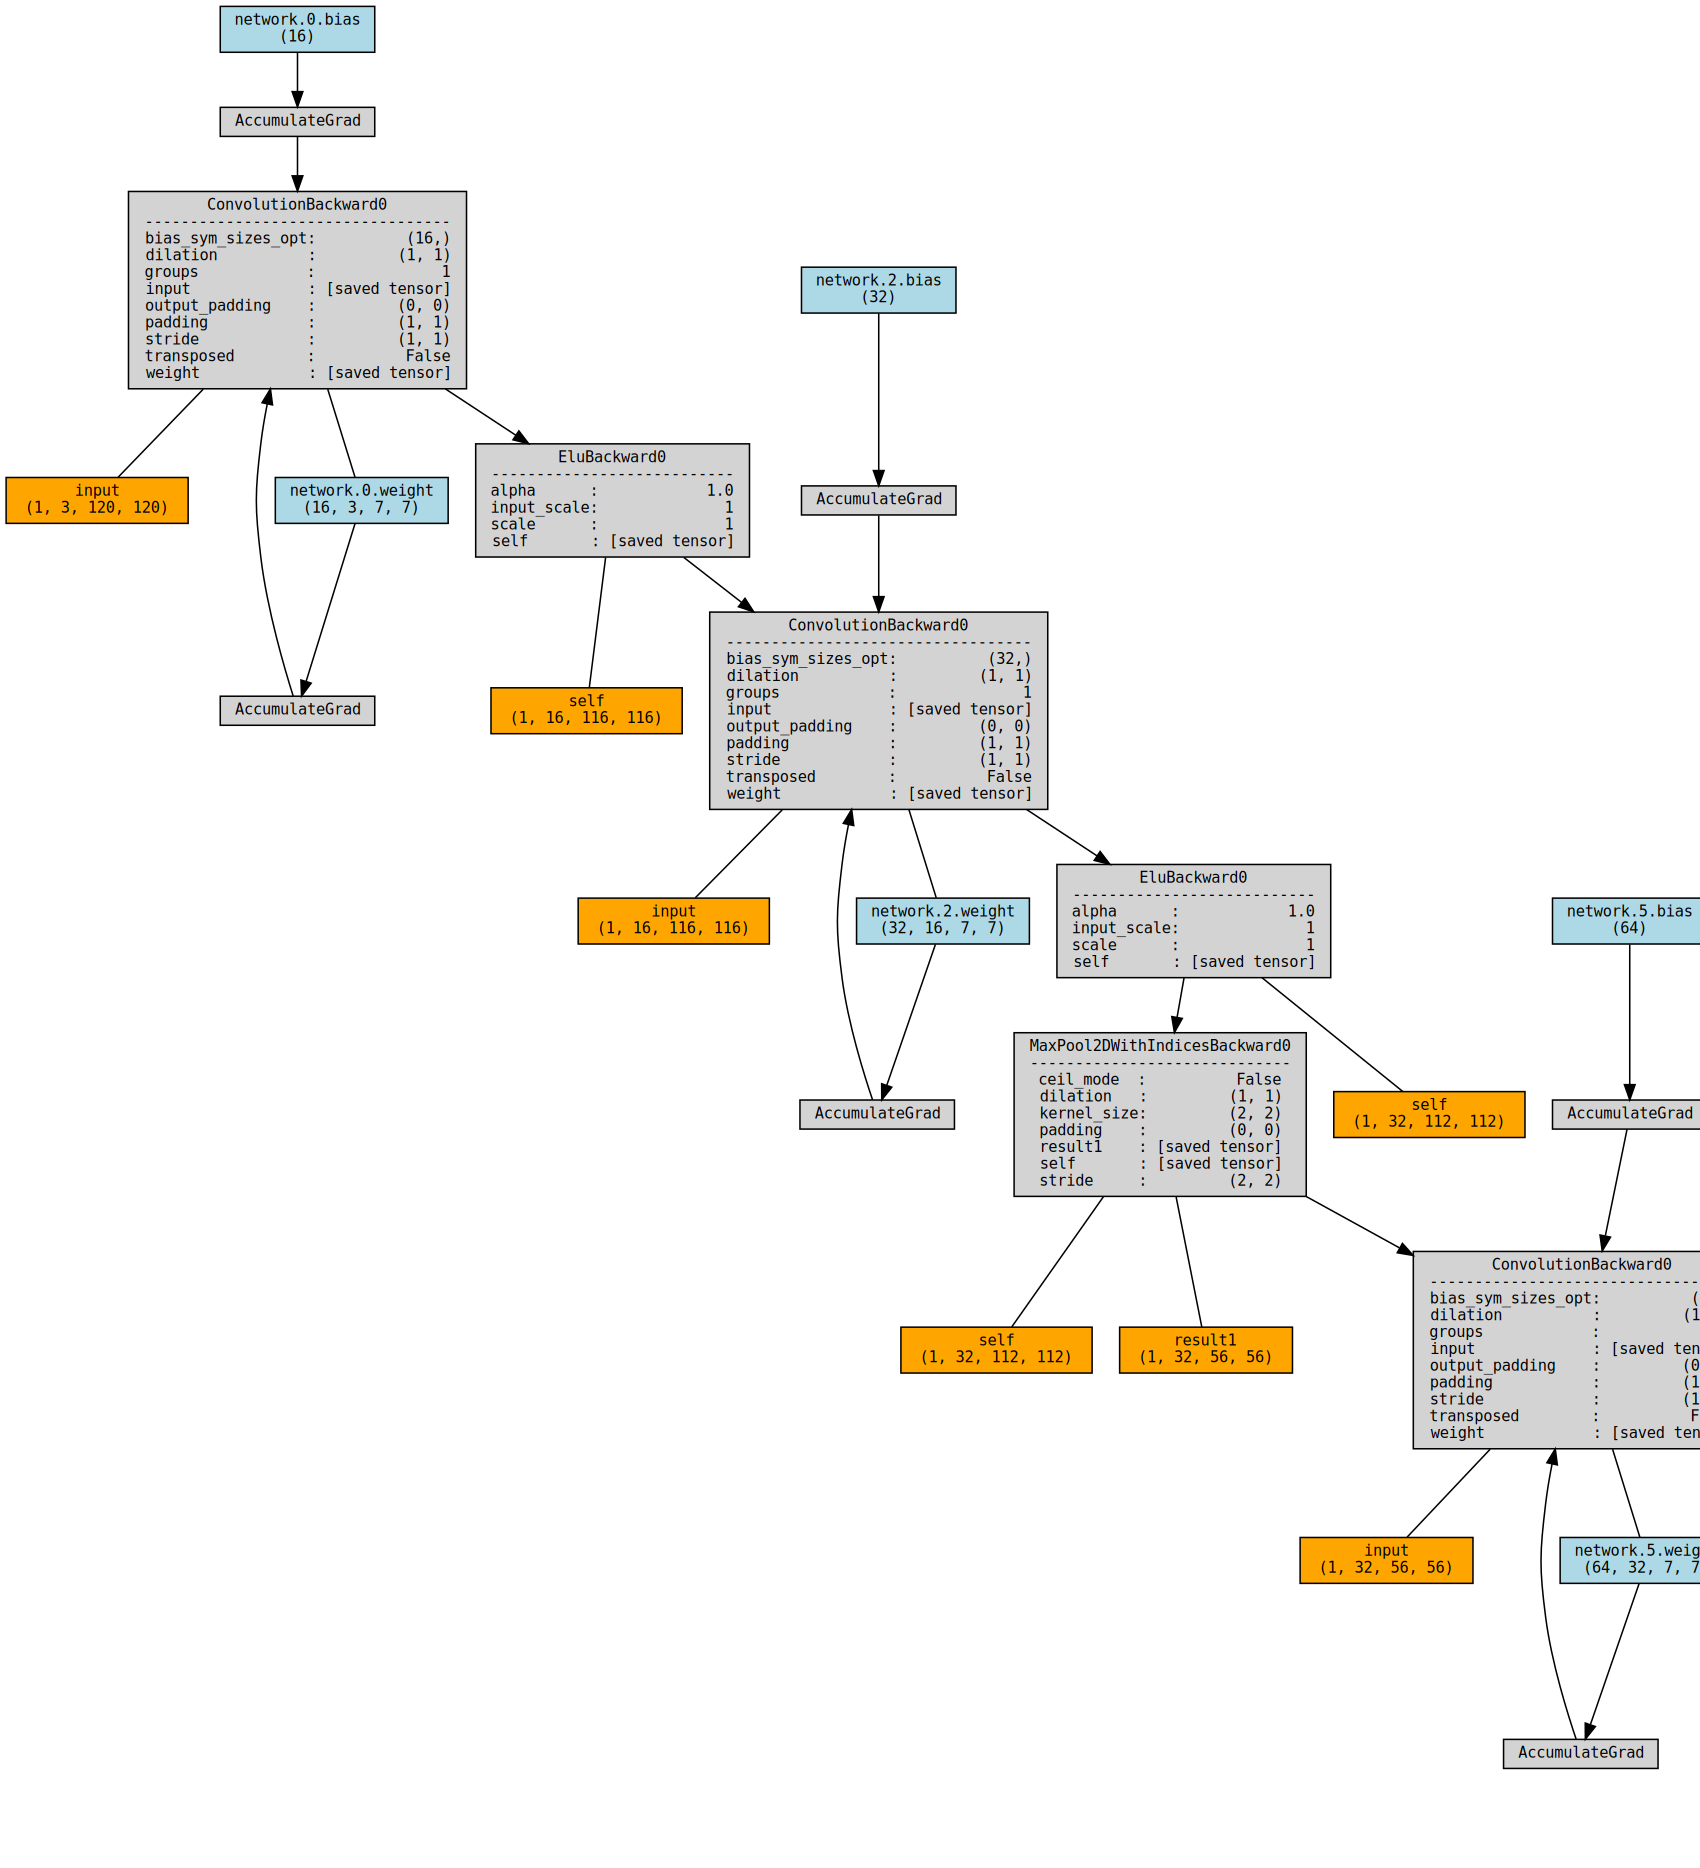

In [ ]:
# TODO: visualize the optimal model
print(cnn_model_3) # print the cnn model
x = torch.randn(1, 3, 120, 120) # sample input to cnn model [batch_size, channels, depth, height, width]
y = cnn_model_3(x) # sample output of cnn model
dot = make_dot(y, params=dict(cnn_model_3.named_parameters()), show_attrs=True, show_saved=True) # create model visualization
dot.format = "pdf" # model visualization saving format
dot.render("/content/drive/My Drive/Coursework/Deep Learning/Mini Project 03/Optimal CNN") # save model visualization
dot # visualize model

### Optimal Model
**List hyperparameters and their values of your optimal model**

| Hyperparameter         | Optimal Model of 5 Variants   | Overall Optimal Model |
|------------------------|----------|-----------|
| Kernel Size            | 7        | 3         |
| # Hidden (Conv) Layers | 5        | 2         |
| Learning Rate          | 0.001    | 0.001     |
| # Epochs               | 5        | 10        |
| Activation Function    | ELU      | ReLU      |

Comparing the above models, one can infer that models with small-moderate kernal size, moderate hidden layers, low learning rate, ReLU/ELU activation trained for 5-10 epochs can perform better for the given classification application with given dataset.

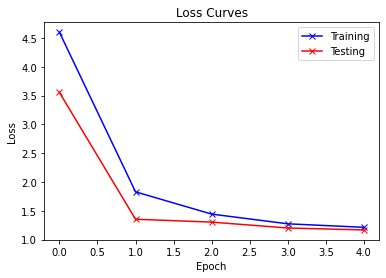

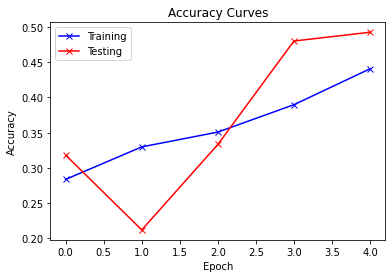

In [ ]:
# TODO: visualize the training history including accuracy curves and loss curves of your optimal model
plot_losses(history_3) # loss curves
plot_accuracies(history_3) # accuracy curves

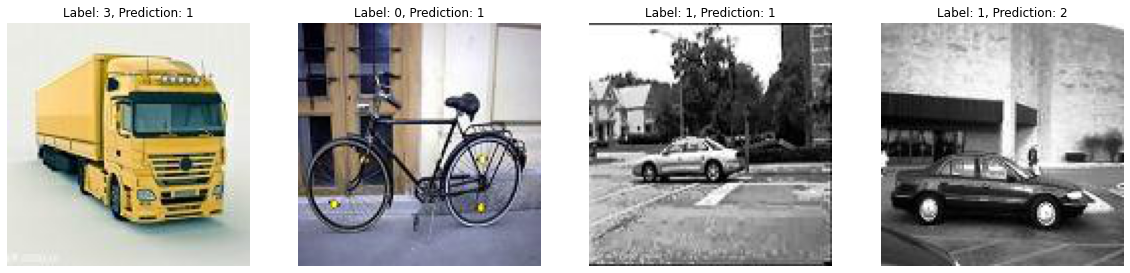

In [ ]:
# TODO: visualize some examples with predicted labels
cnn_model_3.eval() # set model to testing mode
for batch in test_loader: # run predictions over test dataset
    images, labels = batch # extract features and labels from batch
    outputs = cnn_model_3(images) # generate predictions
    _, predictions = torch.max(outputs, dim=1) # convert predictions

# define figure size
plt.figure(figsize=(20, 80))
# subplot to show first prediction
plt.subplot(1, 4, 1)
index = np.random.randint(0, len(predictions)) # generate random index
plt.imshow(images[index].reshape(120, 120, 3)) # reshape and show a random sample
plt.axis('off') # turn off plot axis
plt.title("Label: {}, Prediction: {}".format(np.array(labels)[index], np.array(predictions)[index]))
# subplot to show second prediction
plt.subplot(1, 4, 2)
index = np.random.randint(0, len(predictions)) # generate random index
plt.imshow(images[index].reshape(120, 120, 3)) # reshape and show a random sample
plt.axis('off') # turn off plot axis
plt.title("Label: {}, Prediction: {}".format(np.array(labels)[index], np.array(predictions)[index]))
# subplot to show third prediction
plt.subplot(1, 4, 3)
index = np.random.randint(0, len(predictions)) # generate random index
plt.imshow(images[index].reshape(120, 120, 3)) # reshape and show a random sample
plt.axis('off') # turn off plot axis
plt.title("Label: {}, Prediction: {}".format(np.array(labels)[index], np.array(predictions)[index]))
# subplot to show fourth prediction
plt.subplot(1, 4, 4)
index = np.random.randint(0, len(predictions)) # generate random index
plt.imshow(images[index].reshape(120, 120, 3)) # reshape and show a random sample
plt.axis('off') # turn off plot axis
plt.title("Label: {}, Prediction: {}".format(np.array(labels)[index], np.array(predictions)[index]))
plt.show()